# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [9]:
# import 

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [3]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)


In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


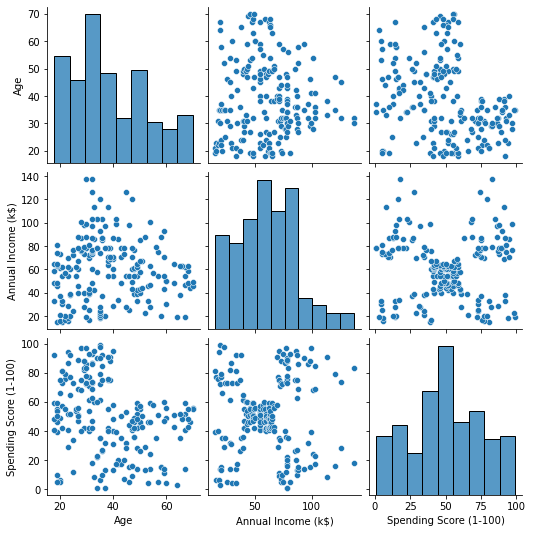

In [10]:
sns.pairplot(df)

<AxesSubplot:>

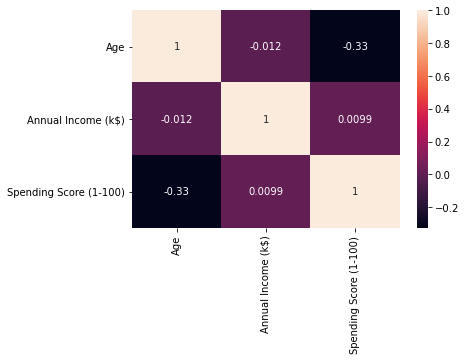

In [11]:
sns.heatmap(df.corr(),annot=True)


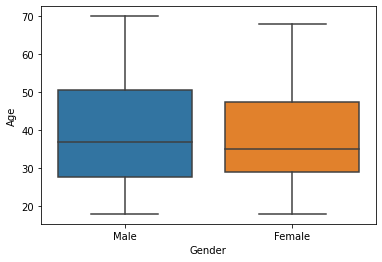

In [12]:
sns.boxplot(x='Gender',y='Age',data=df);


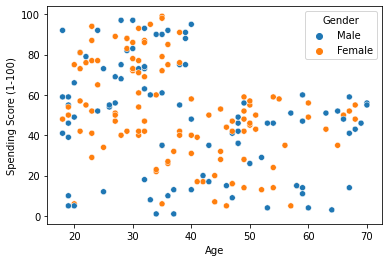

In [14]:
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.show()

## 2. Clustering

In [16]:
df = df[['Annual Income (k$)',"Spending Score (1-100)"]]
df.head(10)

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76
7,18,6
8,18,94
9,19,3


In [18]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means.fit(df)

KMeans(n_clusters=5, n_init=12)

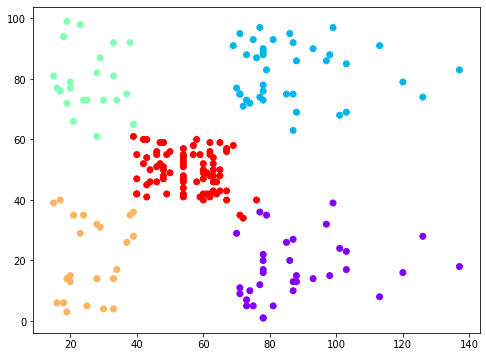

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=k_means.labels_, cmap='rainbow')

## 3. Evaluation

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(df, k_means.labels_, metric='euclidean')


0.553931997444648